In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import cv2
import random
# import tensorflow_datasets as tfds
import pandas as pd
from tqdm import tqdm,trange
# import pathlib

In [3]:
# 確認壓縮檔路徑
filepath='/content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/'
os.listdir(filepath)

['Project-Traffic Sign Classifier.zip',
 'TrafficSign_Classifier.h5',
 'TrafficSign_Classifier.ipynb']

In [4]:
# 解壓縮檔案
!unzip '/content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/Project-Traffic Sign Classifier.zip' -d '/content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2'

Archive:  /content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/Project-Traffic Sign Classifier.zip
  inflating: /content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/06CIFAR100_jupyterNotbook.txt  
  inflating: /content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/Project-Traffic Sign Classifier.pdf  
  inflating: /content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/TrafficSign Classifier Project/examples/grayscale.jpg  
  inflating: /content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/TrafficSign Classifier Project/examples/placeholder.png  
  inflating: /content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/TrafficSign Classifier Project/examples/random_noise.jpg  
  inflating: /content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/TrafficSign Classifier Project/examples/visualization.jpg  
  inflating: /content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/TrafficSign Classifier Project/signnames.csv  
 extracting: /content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier

In [5]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = '/content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/TrafficSign Classifier Project/traffic-signs-data/train.p'
validation_file='/content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/TrafficSign Classifier Project/traffic-signs-data/valid.p'
testing_file = '/content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/TrafficSign Classifier Project/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import random
import pandas as pd

# TODO: Number of training examples
n_train =34799

n_valid=4410

# TODO: Number of testing examples.
n_test = 12630

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1],X_train.shape[2],X_train.shape[3]]

# TODO: How many unique classes/labels there are in the dataset.
def getLabelsCount(labels):
    d = dict(zip(labels, [0] * len(labels)))
    for x in labels:
        d[x] += 1
    return d
signsDicts = getLabelsCount(y_train)
n_classes = len(signsDicts)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

def getSignNames():
    return pd.read_csv('/content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/TrafficSign Classifier Project/signnames.csv').values

def plotImages(X, y, examples_per_sign=15, squeeze=False, cmap=None):
    samples_per_sign = np.bincount(y)
    for sign in getSignNames():
        print("{0}. {1} - Samples: {2}".format(sign[0], sign[1], samples_per_sign[sign[0]]))
        sample_indices = np.where(y==sign[0])[0]
        random_samples = random.sample(list(sample_indices), examples_per_sign)
        fig = plt.figure(figsize = (examples_per_sign, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for i in range(examples_per_sign):
            image = X[random_samples[i]]
            axis = fig.add_subplot(1,examples_per_sign, i+1, xticks=[], yticks=[])
            if squeeze: image = image.squeeze()
            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()
        print("----------------------------------------------------------------------------\n")
plotImages(X_train, y_train)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
# Record class name
class_names=getSignNames()
print(class_names[:,1])

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn right ahead'
 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric tons']


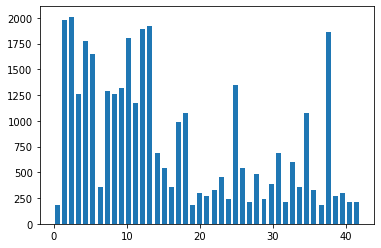

In [9]:
# plot the histogram
hist,bins = np.histogram(y_train,bins=n_classes)
width = 0.7*(bins[1]-bins[0])
center = (bins[:-1]+bins[1:])/2
plt.bar(center,hist,align='center',width=width)
plt.show()

3


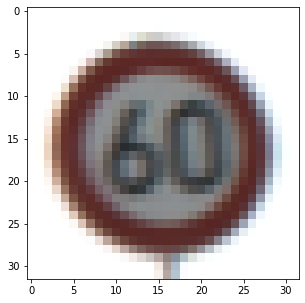

In [10]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(5,5))
plt.imshow(image)
print(y_train[index])  

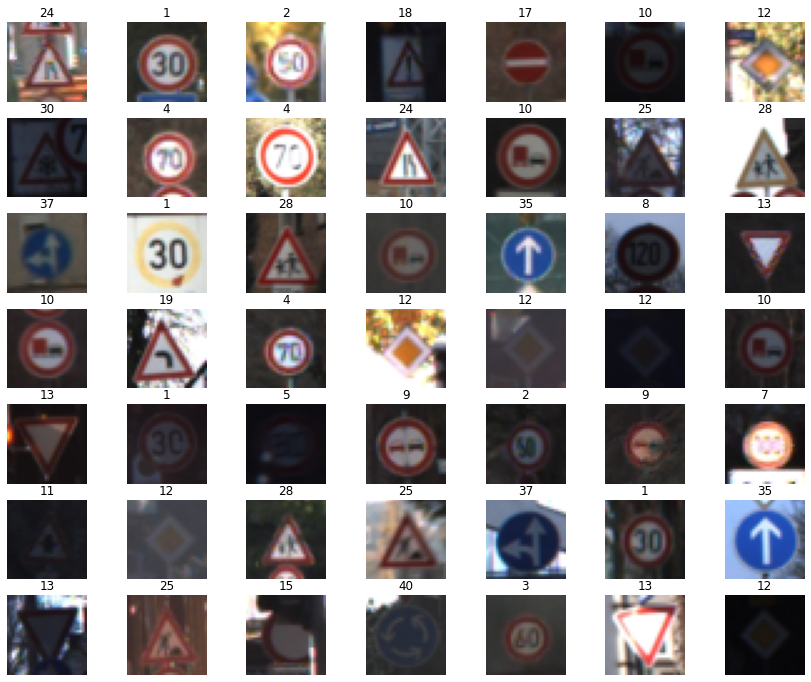

In [11]:
fig,axs = plt.subplots(7,7,figsize=(15,12))
fig.subplots_adjust(hspace=.2, wspace=.001)
axs =axs.ravel()
for i in range(49):
  index = random.randint(0, len(X_train))
  image = X_train[index]
  axs[i].axis('off')
  axs[i].imshow(image)
  axs[i].set_title(y_train[index])

In [12]:
grayscale_train = tf.image.rgb_to_grayscale(X_train)
grayscale_valid = tf.image.rgb_to_grayscale(X_valid)
grayscale_test = tf.image.rgb_to_grayscale(X_test)
print('grayscale_train shape: ',grayscale_train.shape)
print('grayscale_valid: ',grayscale_valid.shape)
print('grayscale_test shape: ',grayscale_test.shape)

grayscale_train shape:  (34799, 32, 32, 1)
grayscale_valid:  (4410, 32, 32, 1)
grayscale_test shape:  (12630, 32, 32, 1)


In [13]:
# Label Encoding (be careful! run just once!)
from keras.utils.np_utils import to_categorical 

# convert to one-hot-encoding(one hot vectors)
y_train = to_categorical(y_train, num_classes = 43)
# convert to one-hot-encoding(one hot vectors)
y_valid = to_categorical(y_valid, num_classes = 43)
# convert to one-hot-encoding(one hot vectors)
y_test = to_categorical(y_test, num_classes = 43)
print('y_train shape: ',y_train.shape)
print('y_valid shape: ',y_valid.shape)
print('y_test shape: ',y_test.shape)

y_train shape:  (34799, 43)
y_valid shape:  (4410, 43)
y_test shape:  (12630, 43)


In [14]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix

from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization #Dense:全連接層
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [15]:
# define model
cnn=Sequential() # name the network
##### feature extraction #####
#1. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), input_shape=(32,32,1),activation='relu',padding='same'))
cnn.add(BatchNormalization())
#2. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
# Pooling
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

#3. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
#4. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
# Pooling
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

#5. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
#6. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
#7. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
# Pooling
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

#9. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
#10. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
#11. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
# Pooling
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

#13. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
#14. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
#15. LAYER
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(BatchNormalization())
# Pooling
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.GlobalAveragePooling2D())
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(units=43, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [16]:
# comiple model
cnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [17]:
# Data Augmentation
datagen = ImageDataGenerator(featurewise_center=False,  # 以每一張feature map為單位將平均值設為0
                samplewise_center=False,  # set each sample mean to 0
                featurewise_std_normalization=False,  # 以每一張feature map為單位將數值除以其標準差(上述兩步驟就是我們常見的Standardization)
                samplewise_std_normalization=False,  #  將输入的每個樣本除以其自身的標準差。
                zca_whitening=False,  # dimesion reduction
                rotation_range=0.2,  # 隨機旋轉圖片
                zoom_range = 0.2, #  隨機縮放範圍
                width_shift_range=0.2,  #  水平平移，相對總寬度的比例
                height_shift_range=0.2,  # 垂直平移，相對總高度的比例
                horizontal_flip=False,  # 一半影象水平翻轉
                vertical_flip=False)  # 一半影象垂直翻轉
datagen.fit(grayscale_train)

In [18]:
# # 載入最近的檢查點的權重
# cnn.load_weights(filepath='/content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/TrafficSign_Classifier.h5')

history = cnn.fit_generator(datagen.flow(grayscale_train, y_train, batch_size=16),shuffle=True,epochs=10, 
                              validation_data = (grayscale_valid, y_valid),
                              # verbose = 2, #verbose=2過程全顯示
                              steps_per_epoch=grayscale_train.shape[0] // 16,
                              )

Epoch 1/10
2174/2174 [==============================] - 53s 19ms/step - loss: 3.2279 - accuracy: 0.1591 - val_loss: 1.4456 - val_accuracy: 0.5667
Epoch 2/10
2174/2174 [==============================] - 40s 18ms/step - loss: 0.7972 - accuracy: 0.7514 - val_loss: 0.3130 - val_accuracy: 0.9095
Epoch 3/10
2174/2174 [==============================] - 40s 19ms/step - loss: 0.2785 - accuracy: 0.9197 - val_loss: 0.1976 - val_accuracy: 0.9483
Epoch 4/10
2174/2174 [==============================] - 40s 18ms/step - loss: 0.1696 - accuracy: 0.9545 - val_loss: 0.0973 - val_accuracy: 0.9748
Epoch 5/10
2174/2174 [==============================] - 40s 19ms/step - loss: 0.1236 - accuracy: 0.9700 - val_loss: 0.1516 - val_accuracy: 0.9694
Epoch 6/10
2174/2174 [==============================] - 40s 18ms/step - loss: 0.1005 - accuracy: 0.9756 - val_loss: 0.1180 - val_accuracy: 0.9741
Epoch 7/10
2174/2174 [==============================] - 40s 19ms/step - loss: 0.0818 - accuracy: 0.9809 - val_loss: 0.0717 -

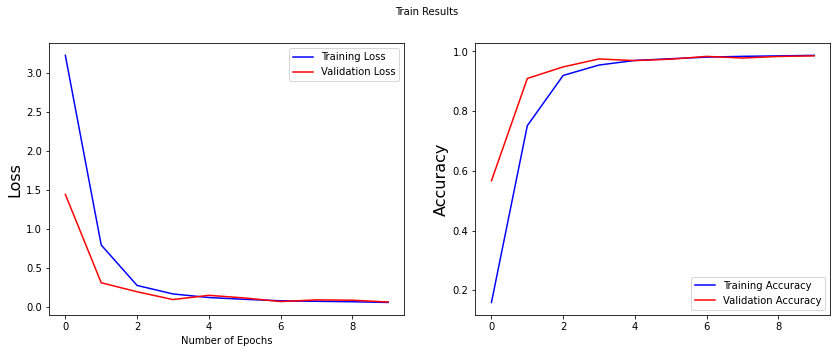

In [19]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [20]:
# save the best weights
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/TrafficSign_Classifier.h5', verbose=1, save_best_only=True)

history = cnn.fit_generator(datagen.flow(grayscale_train, y_train, batch_size=16),shuffle=True,epochs=1, 
                              validation_data = (grayscale_valid, y_valid),
                              steps_per_epoch=grayscale_train.shape[0] // 16,
                              callbacks=[checkpointer])

2173/2174 [============================>.] - ETA: 0s - loss: 0.0500 - accuracy: 0.9887
Epoch 1: val_loss improved from inf to 0.10649, saving model to /content/drive/MyDrive/自動駕駛實務/TrafficSign_Classifier-P2/TrafficSign_Classifier.h5
2174/2174 [==============================] - 43s 20ms/step - loss: 0.0501 - accuracy: 0.9886 - val_loss: 0.1065 - val_accuracy: 0.9810


In [21]:
#輸入數據(data)和黃金標準(label),然後將預測結果與黃金標準相比較,得到兩者誤差並輸出
score = cnn.evaluate(grayscale_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.17059145867824554
Test Accuracy: 0.9638954997062683


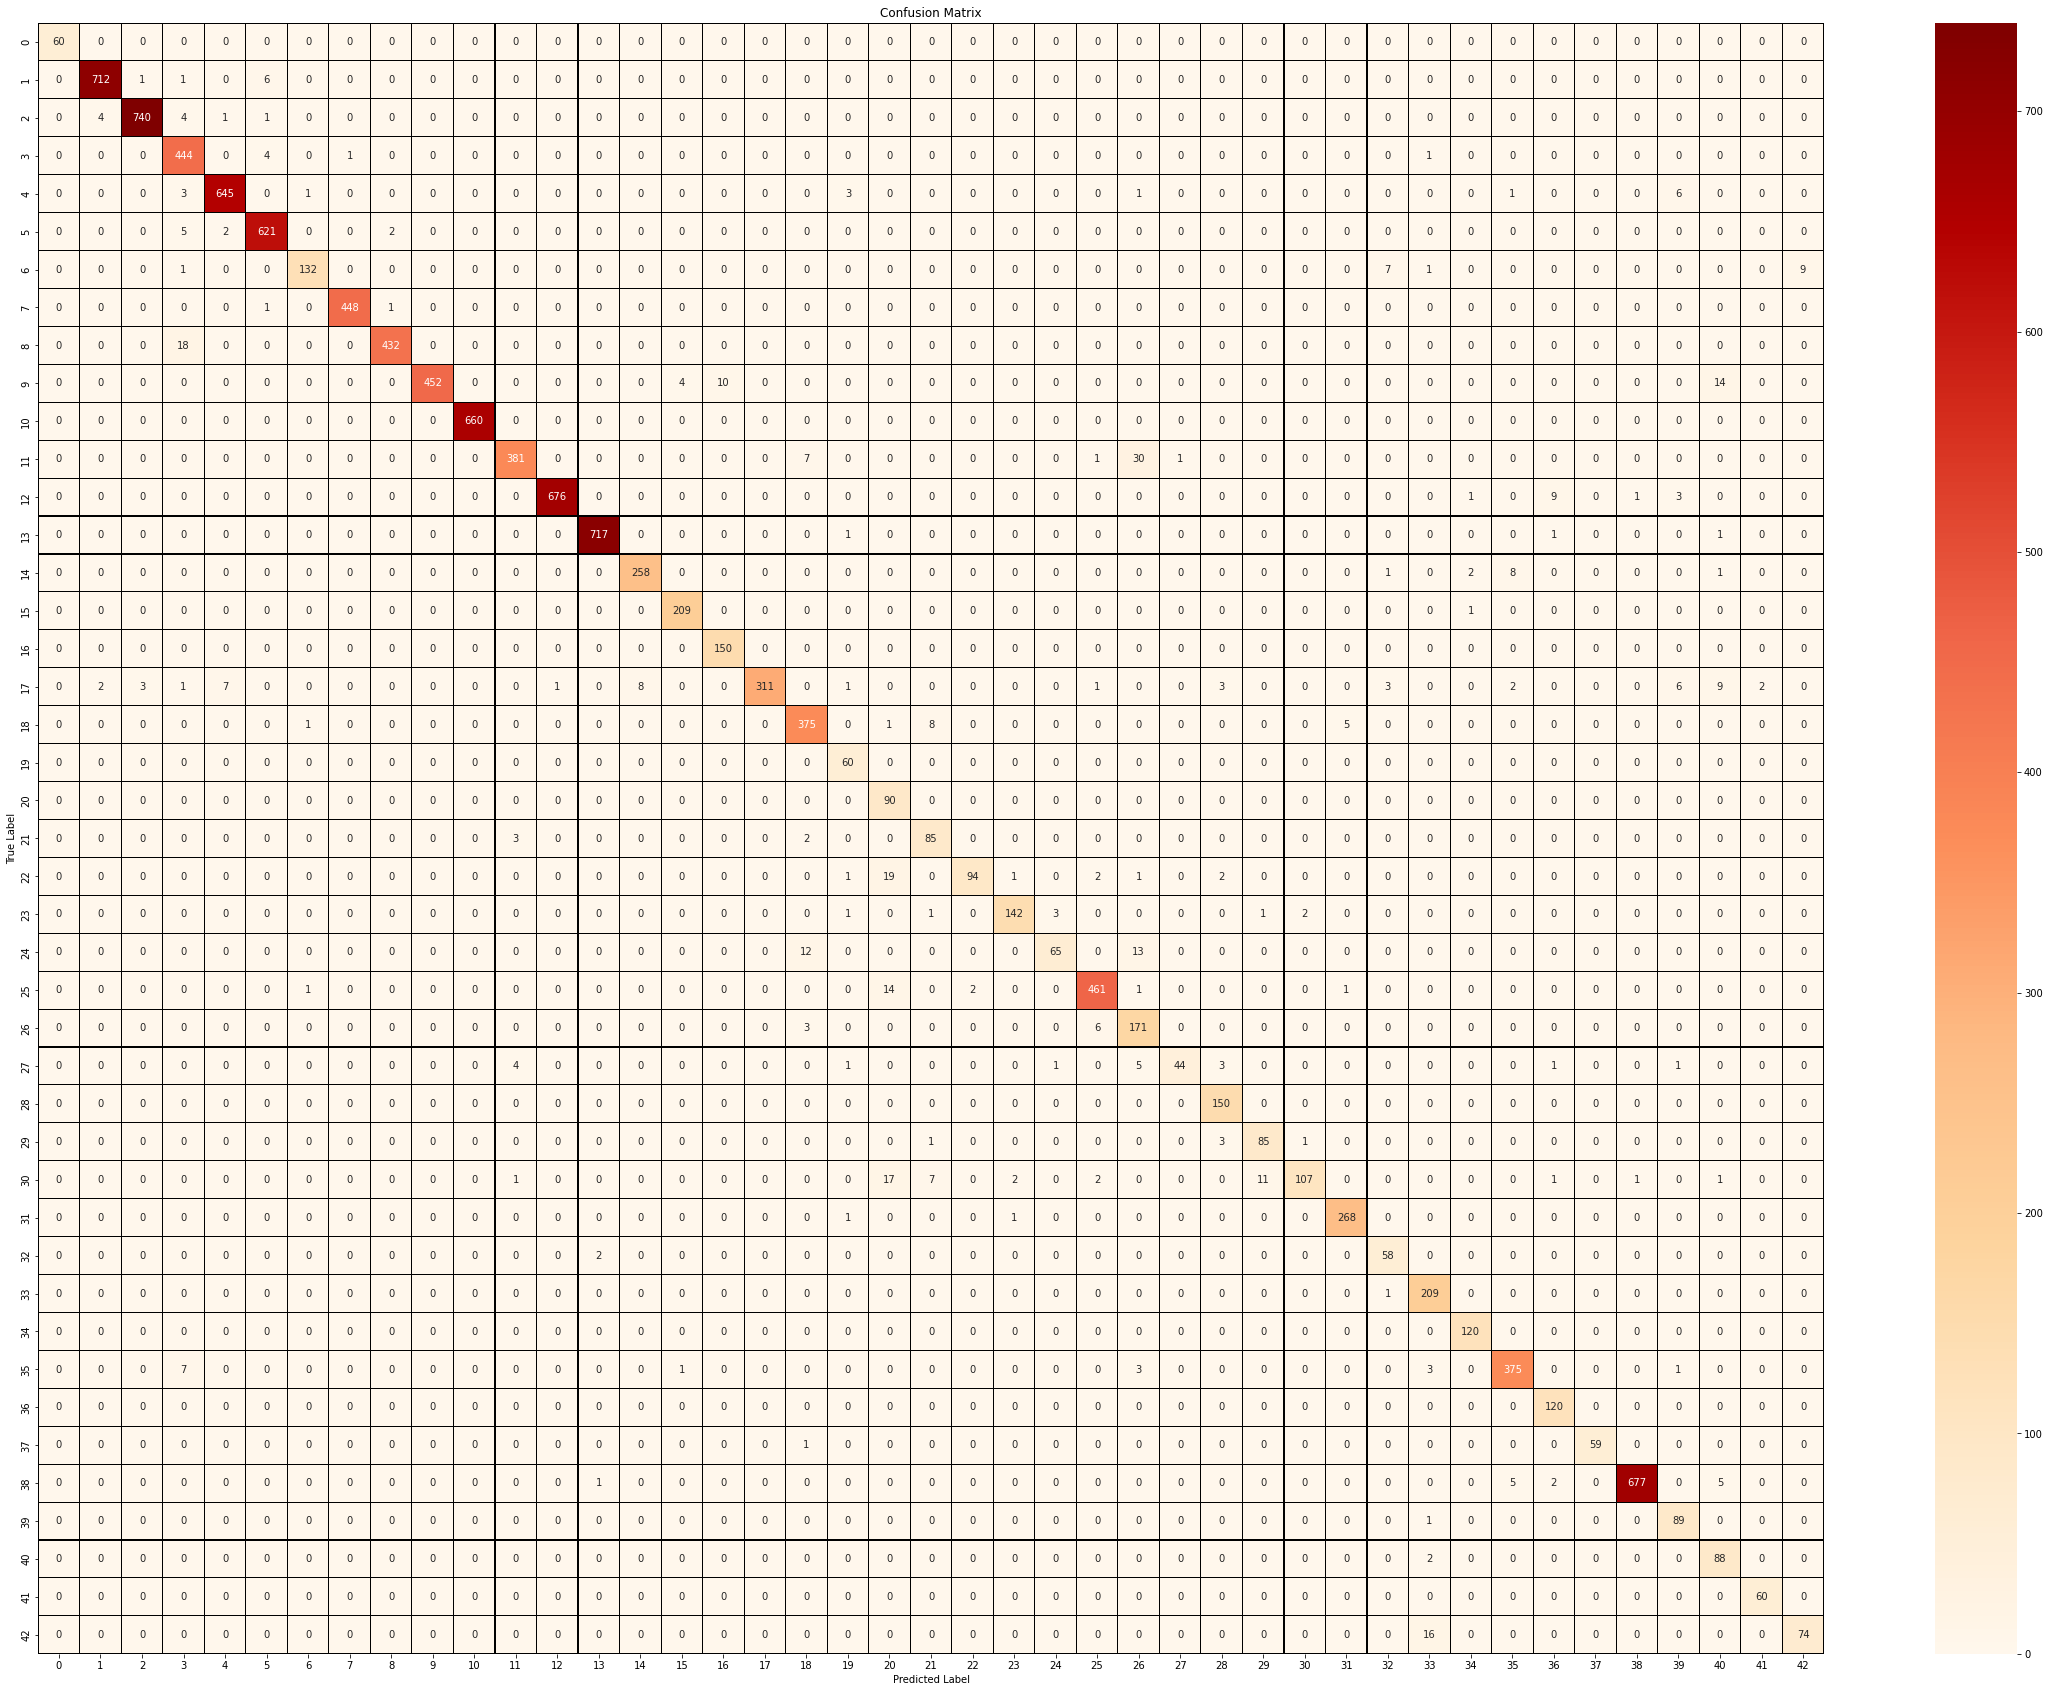

In [22]:
#Plot confusion_matrix
import seaborn as sn
pred = cnn.predict(grayscale_test)
pred_classes = np.argmax(pred, axis = 1)
true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(true, pred_classes) 

f,ax = plt.subplots(figsize = (40,30))
sn.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = 'OrRd', linecolor="black", fmt='g', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
#繪製此圖以查看完整的 43 個類別預測集。 亦即 = 繪製predictions的全圖

#定義一個繪圖函數
def plot_image(i, predictions_array, true_label , img):
  true_label, img = true_label[i], img[i,:,:,0] #正確的標籤與圖像
  
  #定義軸的格線和刻度
  plt.grid(False)
  plt.xticks([]) #傳遞一個空列表會刪除所有X軸刻度。
  plt.yticks([])
  #繪圖
  plt.imshow(img, cmap=plt.cm.binary)
  #預測出來的label
  predicted_label = np.argmax(predictions_array) #array中的最大值
  
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"
  #定義X軸的主題(預測的類別 預測的機率 真正的類別) :2.0f是取到浮點數小數點後2位
  plt.xlabel("Predict_Label: {} {:2.0f}%\nTrue_Label: {}".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

#定義一個可以將值可視化的函數
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i] #正確的標籤
  plt.grid(True)
  plt.xticks(range(43)) #設定X軸刻度0-43
  plt.yticks([0,0.5,1]) #設定Y軸刻度
  #繪製長條圖
  thisplot = plt.bar(range(43), predictions_array, color="#ff0033") #深紅色
  #y軸的刻度限制
  plt.ylim([0, 1])
  #預測出來的label array中的最大值
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [24]:
# #讓我們用他們的預測繪製幾個圖像。 請注意，即使非常自信，模型也可能是錯誤的。 繪製prediction全圖
# # Plot the first X test images, their predicted labels, and the true labels.
# # Color correct predictions in blue and incorrect predictions in red.

# #定義列跟行(兩張圖片為一組)
# num_rows = 30
# num_cols = 1

# num_images = num_rows*num_cols #設定圖片張數總共30張圖片

# plt.figure(figsize=(16*num_cols, 8*num_rows)) #設定總圖大小

# for i in range(num_images):

#   plt.subplot(num_rows, 2*num_cols, 2*i+1) #1/3/5/7/9/....
#   plot_image(i, pred[i], true, grayscale_test)
  
#   plt.subplot(num_rows, 2*num_cols, 2*i+2) #2/4/6/8/10/......
#   plot_value_array(i, pred[i], true)
  
#   plt.tight_layout()


# plt.show()

In [25]:
def show_img(img):
    plt.figure(figsize=(7,7)) 
    plt.imshow(img)
    plt.show()
def gaussian_noise(img, mean=0, sigma=0.1):
    
    # int -> float (標準化)
    img = img / 255.0
    # 隨機生成高斯 noise (float + float)
    noise = np.random.normal(mean, sigma, img.shape)
    # noise + 原圖
    gaussian_out = img + noise
    # 所有值必須介於 0~1 之間，超過1 = 1，小於0 = 0
    gaussian_out = np.clip(gaussian_out, 0, 1)
    
    # 原圖: float -> int (0~1 -> 0~255)
    gaussian_out = np.uint8(gaussian_out*255)
    # noise: float -> int (0~1 -> 0~255)
    noise = np.uint8(noise*255)
    print("Picture add gaussian noise: ")
    show_img(gaussian_out)

def img_processing(img):
    # do something here
    img = gaussian_noise(img)

In [26]:
# # make new images
# test_new=np.zeros((10,32,32,3))
# label_test_new=np.zeros((10,43))
# for i in range(10):
#   x = random.randint(0,n_test)
#   print(x)
#   show_img(X_test[x])
#   # test_new[i]=X_test[x]
#   label_test_new[i]=y_test[i]
#   test_new[i] = img_processing(X_test[x])

In [27]:
def Sharpening(image):
  Kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
  sharpening_image = cv2.filter2D(src=image, ddepth=-1, kernel=Kernel)
  return sharpening_image

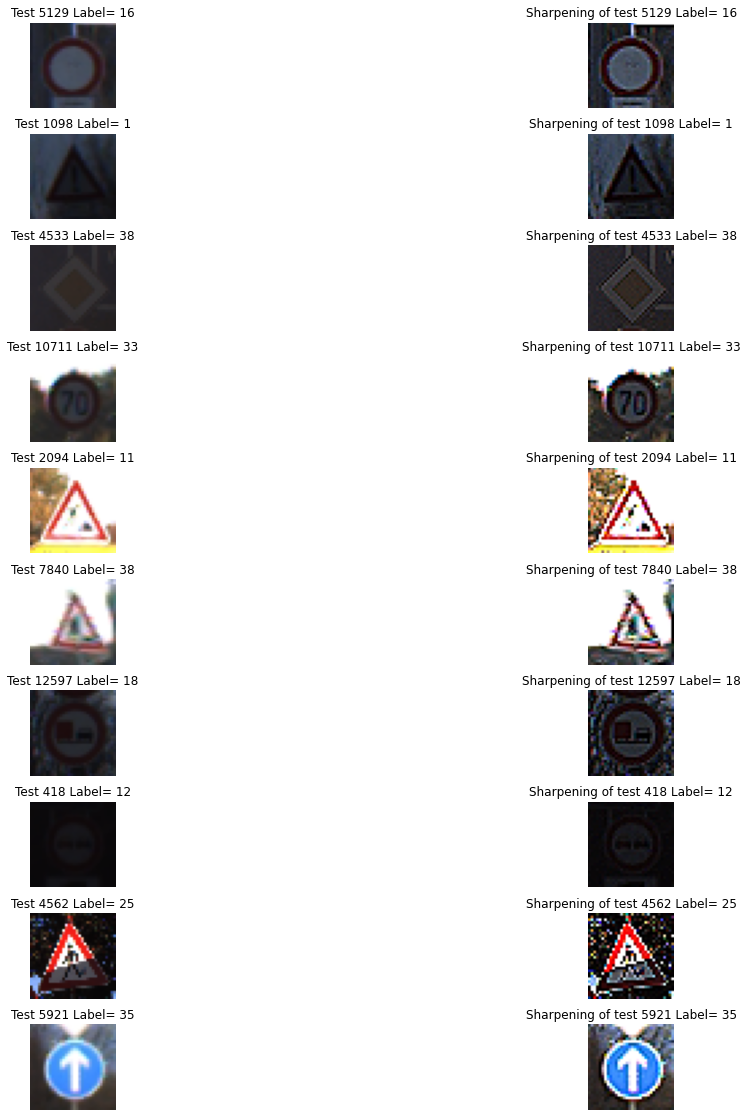

In [107]:
# make new images
test_new=np.zeros((20,32,32,3))
test_new=test_new.astype('uint8')
label_test_new=np.zeros((20,43))
fig,axs = plt.subplots(10,2,figsize=(20,20))
fig.subplots_adjust(hspace=.3, wspace=.001)
axs =axs.ravel()
for i in range(1,11,1):
  index = random.randint(0, n_test)
  title1= 'Test '+str(index)+' Label= '+str(np.argmax(y_test[i-1]))
  title2= 'Sharpening of test '+str(index)+' Label= '+str(np.argmax(y_test[i-1]))
  label_test_new[i-1]=y_test[i-1]
  sharpening_image = Sharpening(X_test[index])
  test_new[i-1]=sharpening_image
  axs[i*2-2].axis('off')
  axs[i*2-2].imshow(X_test[index])
  axs[i*2-2].set_title(title1)
  axs[i*2-1].axis('off')
  axs[i*2-1].imshow(sharpening_image)
  axs[i*2-1].set_title(title2)

In [108]:
grayscale_test_new = tf.image.rgb_to_grayscale(test_new)
grayscale_test_new=grayscale_test_new.numpy()
trueY=np.zeros((10,1)).astype('uint8')
preds=np.zeros((10,1)).astype('uint8')
preds_prob=np.zeros((10,5)).astype('float')
top5=np.zeros((10,5)).astype("uint8")
print(grayscale_test_new.shape)
for i in range(10):
  trueY[i] = np.argmax(label_test_new[i])
  img = grayscale_test_new[i]
  test_img = img.reshape(1,32,32,1)
  
  #預測類別
  preds[i]=np.argmax(cnn.predict(test_img))
  # preds = np.argmax((cnn.predict(test_img)>0.5).astype("int32"))
  #預測機率
  prob = cnn.predict(test_img)
  prob_rank=np.argsort(prob)
  top5[i]=prob_rank[:,42:37:-1]
  for j in range(5):#record top5 probability
      preds_prob[i][j]=prob[:,top5[i][j]]

  print("trueY: ",trueY[i])
  print("preds: ",preds[i])
  print("top5: ",top5[i])
  print("top5_Prob: ",preds_prob[i])
  # print("all_Prob: ",prob)
  print("***********************************************************************")

(20, 32, 32, 1)
trueY:  [16]
preds:  [15]
top5:  [15  3 33 32 34]
top5_Prob:  [0.58485001 0.28671938 0.04789686 0.02374901 0.01658265]
***********************************************************************
trueY:  [1]
preds:  [18]
top5:  [18 26  6 32 16]
top5_Prob:  [9.99879599e-01 5.45942239e-05 3.43719694e-05 4.09529730e-06
 3.31501178e-06]
***********************************************************************
trueY:  [38]
preds:  [12]
top5:  [12 38  4 17  0]
top5_Prob:  [9.99994755e-01 3.23425570e-06 4.31867846e-07 3.92449181e-07
 3.24353920e-07]
***********************************************************************
trueY:  [33]
preds:  [4]
top5:  [4 1 0 6 2]
top5_Prob:  [9.98841822e-01 3.93480092e-04 1.83984754e-04 1.77136812e-04
 5.92742435e-05]
***********************************************************************
trueY:  [11]
preds:  [25]
top5:  [25 10 31 22 21]
top5_Prob:  [9.99602973e-01 1.87449128e-04 9.14807824e-05 3.35816985e-05
 1.92507559e-05]
************************

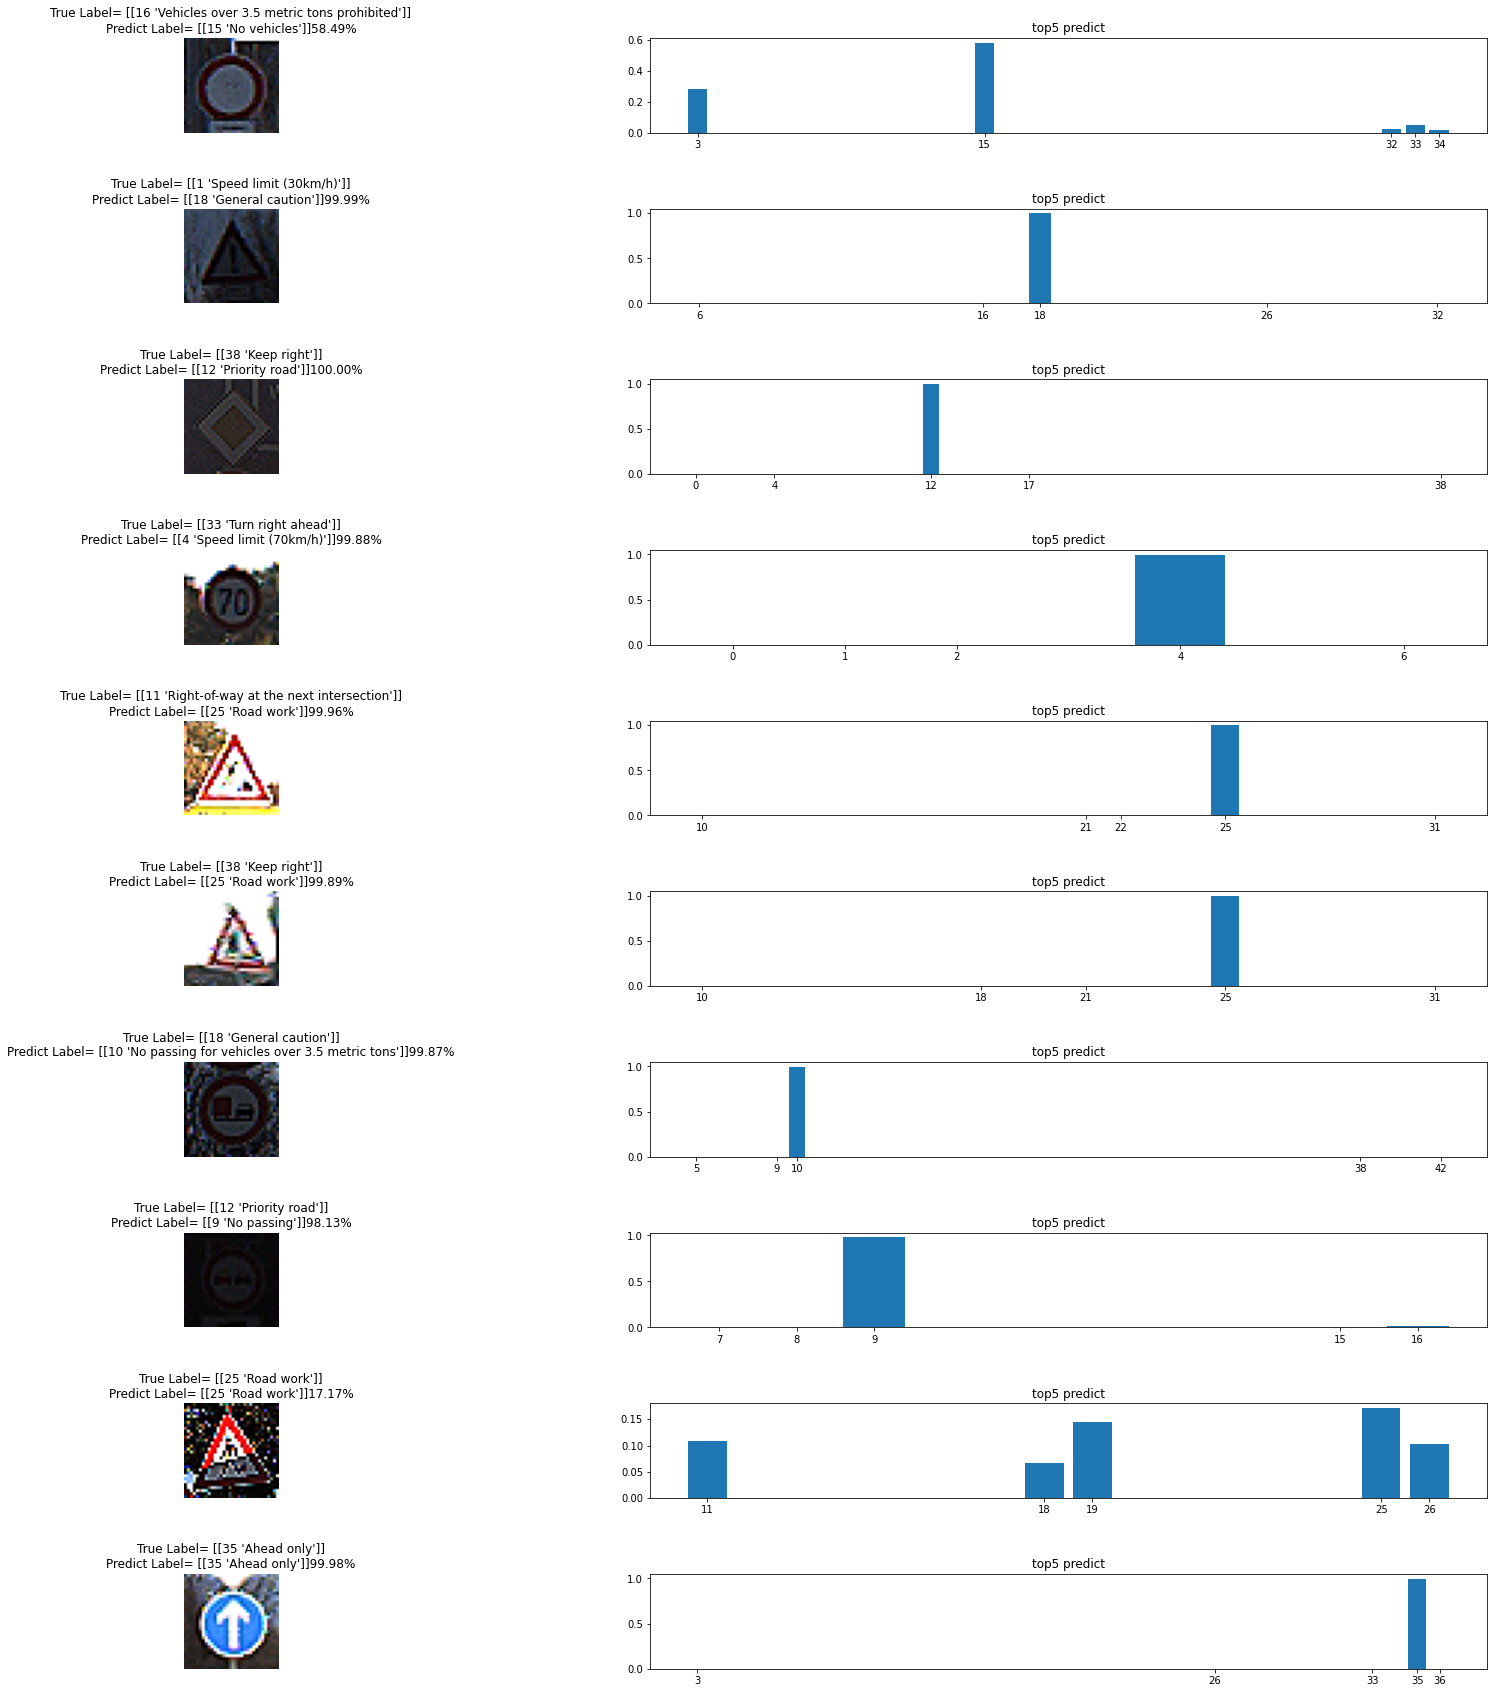

In [109]:
fig,axs = plt.subplots(10,2,figsize=(30,30))
fig.subplots_adjust(hspace=.8, wspace=.001)
axs =axs.ravel()
class_names
for i in range(1,11,1):
    percent=preds_prob[i-1][0]*100
    percent=format(percent,'.2f')
    title1 = 'True Label= '+ str(class_names[trueY[i-1]]) +'\nPredict Label= '+str(class_names[preds[i-1]])+str(percent)+'%'
    title2 ='top5 predict'
    axs[i*2-2].axis('off')
    axs[i*2-2].imshow(test_new[i-1])
    axs[i*2-2].set_title(title1)
    axs[i*2-1].bar(top5[i-1], preds_prob[i-1])
    axs[i*2-1].set_title(title2)
    axs[i*2-1].set_xticks(list(top5[i-1]))